In [19]:
import numpy as np
from src.utils.utils import *
from src.utils import plot_config
import matplotlib.pyplot as plt

In [20]:
data_engs = np.load("data/conditionalMADE-data/100-10mus/train_10mus-engs.npy")[:, 0]

In [21]:
neigh, coup, len_neigh = get_couplings(10, "data/couplings/100.txt")
samples = np.load("sample-100000_size-101-10us_emean-1.15.npz")
samples = samples["sample"]

engs = []
for sample in samples:
    engs.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))

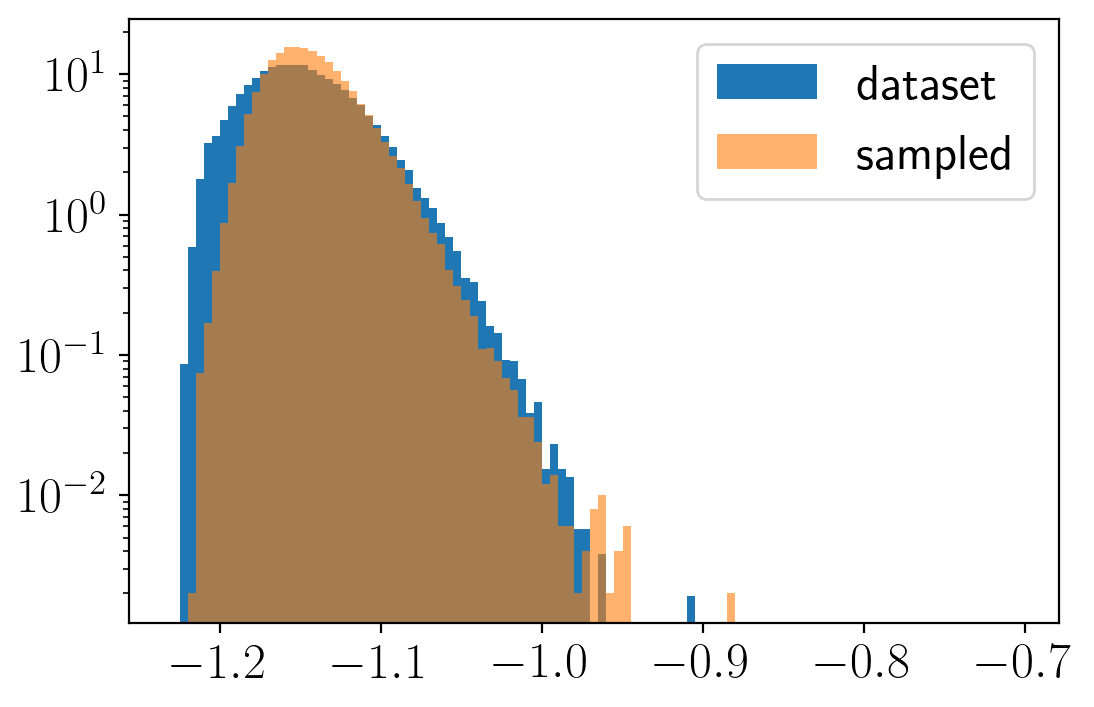

In [22]:
bins = np.arange(-1.23, -0.7, 0.005)
plt.hist(data_engs, bins=bins, label="dataset", density=True)
plt.hist(engs, bins=bins, label="sampled", alpha=.6, density=True)
plt.rcParams["figure.facecolor"] = "w"
plt.yscale("log")
plt.legend()
plt.show()

In [23]:
print(f"engs mean: {data_engs.mean()}")
print(f"engs std: {data_engs.std()}")

engs mean: -1.1474951860175389
engs std: 0.034732275935319


In [24]:
print(f"sampled mean: {np.mean(engs)}")
print(f"sampled std: {np.std(engs)}")

sampled mean: -1.1423733947665065
sampled std: 0.027754379158567676


---
# $1 \mu s$
---

In [25]:
data_engs = np.load("data/conditionalMADE-data/100-1mus/train_1mus-engs.npy")[:, 0]
print(f"mean dataset: {data_engs.mean()}")
print(f"min dataset: {data_engs.min()}")

mean dataset: -1.1191339690673223
min dataset: -1.2210371482010003


In [27]:
neigh, coup, len_neigh = get_couplings(10, "data/couplings/100.txt")
samples12 = np.load("sample-100000_size-101_1us-emean-1.12.npz")
samples12 = samples12["sample"]

samples15 = np.load("sample-100000_size-101_1us-emean-1.5.npz")
samples15 = samples15["sample"]

samples1 = np.load("sample-100000_size-101_1us-emean-1.0.npz")
samples1 = samples1["sample"]

samplesGS = np.load("sample-100000_size-101_1us-emean-GS.npz")
samplesGS = samplesGS["sample"]

engs12 = []
for sample in samples12:
    engs12.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))

engs15 = []
for sample in samples15:
    engs15.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))

engs1 = []
for sample in samples1:
    engs1.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))

engsGS = []
for sample in samplesGS:
    engsGS.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))
    


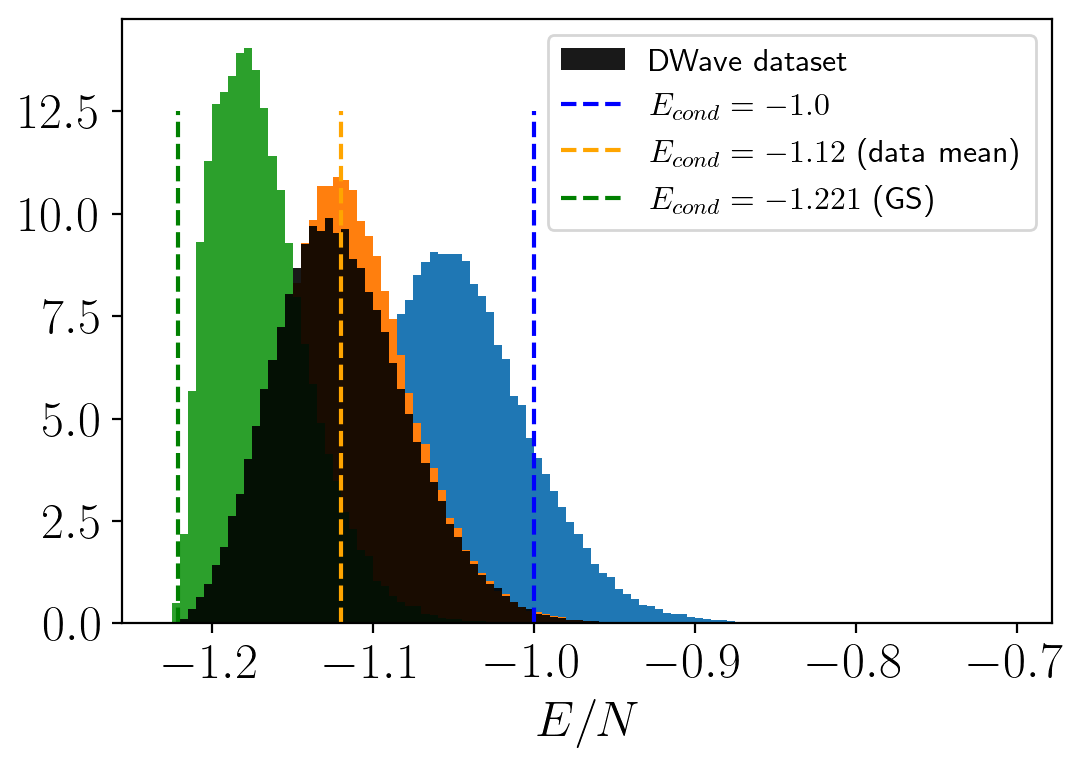

In [30]:

bins = np.arange(-1.23, -0.7, 0.005)
plt.hist(engs1, bins=bins, alpha=1, density=True)
plt.hist(engs12, bins=bins, alpha=1, density=True)
plt.hist(engsGS, bins=bins, alpha=1, density=True)
# plt.hist(engs15, bins=bins, alpha=1, density=True)
plt.hist(data_engs, bins=bins, label="DWave dataset", density=True, color="k", alpha=0.9)
plt.rcParams["figure.facecolor"] = "w"
plt.vlines(-1, 0, 12.5, linestyle="dashed", color="blue", label=r"$E_{cond}=-1.0$")
plt.vlines(-1.12, 0, 12.5, linestyle="--", color="orange", label=r"$E_{cond}=-1.12$ (data mean)")
plt.vlines(-1.221, 0, 12.5, linestyle="--", color="green", label=r"$E_{cond}=-1.221$ (GS)")
plt.xlabel(r"$E/N$")
# plt.yscale("log")
plt.legend(fontsize=11.5)
plt.show()